In [1]:

# Class to represent a graph
class Graph:

    # A utility function to find the
    # vertex with minimum dist value, from
    # the set of vertices still in queue
    def minDistance(self, dist, queue):
        # Initialize min value and min_index as -1
        minimum = float("Inf")
        min_index = -1

        # from the dist array,pick one which
        # has min value and is till in queue
        for i in range(len(dist)):
            if dist[i] < minimum and i in queue:
                minimum = dist[i]
                min_index = i
        return min_index

    # Function to print shortest path
    # from source to j
    # using parent array
    def printPath(self, parent, j):

        # Base Case : If j is source
        if parent[j] == -1:
            print(j, end=' ')
            return
        self.printPath(parent, parent[j])
        print(j, end=' ')

    # A utility function to print
    # the constructed distance
    # array
    def printSolution(self, dist, parent):
        src = 0
        print("Vertex \t\tDistance from Source\tPath")
        for i in range(1, len(dist)):
            print("\n%d --> %d \t\t%d \t\t\t\t\t" % (src, i, dist[i])),
            self.printPath(parent, i)

    '''Function that implements Dijkstra's single source shortest path
    algorithm for a graph represented using adjacency matrix
    representation'''

    def dijkstra(self, graph, src):

        row = len(graph)
        col = len(graph[0])

        # The output array. dist[i] will hold
        # the shortest distance from src to i
        # Initialize all distances as INFINITE
        dist = [float("Inf")] * row

        # Parent array to store
        # shortest path tree
        parent = [-1] * row

        # Distance of source vertex
        # from itself is always 0
        dist[src] = 0

        # Add all vertices in queue
        queue = []
        for i in range(row):
            queue.append(i)

        # Find shortest path for all vertices
        while queue:

            # Pick the minimum dist vertex
            # from the set of vertices
            # still in queue
            u = self.minDistance(dist, queue)

            # remove min element
            queue.remove(u)

            # Update dist value and parent
            # index of the adjacent vertices of
            # the picked vertex. Consider only
            # those vertices which are still in
            # queue
            for i in range(col):
                '''Update dist[i] only if it is in queue, there is
                an edge from u to i, and total weight of path from
                src to i through u is smaller than current value of
                dist[i]'''
                if graph[u][i] and i in queue:
                    if dist[u] + graph[u][i] < dist[i]:
                        dist[i] = dist[u] + graph[u][i]
                        parent[i] = u
        goal_paths = [[] for _ in range(len(dist))]
        for i in range(len(dist)):
            curr_path = []
            curr_idx = i
            while parent[curr_idx] != -1:
                curr_path = [curr_idx] + curr_path
                curr_idx = parent[curr_idx]
            curr_path = [src] + curr_path
            goal_paths[i] = curr_path
        return goal_paths

    

In [2]:
import numpy as np
num_goals = 5
num_chain = 2**num_goals
# Adjacency matrix to switch
goal_matrix = np.zeros((num_chain, num_chain))
transition_prob = np.zeros((num_chain, num_chain))

goal_matrix[0][1] = 1
for j in range(1, num_chain - 1):
    goal_matrix[j][j - 1] = 1.
    goal_matrix[j][j + 1] = 1.
goal_matrix[-1][-2] = 1.
# goal_matrix[0] = np.array([0, 1, 1, 0, 1, 0, 0, 0])
# goal_matrix[1] = np.array([1, 0, 0, 1, 0, 1, 0, 0])
# goal_matrix[2] = np.array([1, 0, 0, 1, 0, 0, 1, 0])
# goal_matrix[3] = np.array([0, 1, 1, 0, 0, 0, 0, 1])
# goal_matrix[4] = np.array([1, 0, 0, 0, 0, 1, 1, 0])
# goal_matrix[5] = np.array([0, 1, 0, 0, 1, 0, 0, 1])
# goal_matrix[6] = np.array([0, 0, 1, 0, 1, 0, 0, 1])
# goal_matrix[7] = np.array([0, 0, 0, 1, 0, 1, 1, 0])



# for i in range(num_chain):
#     binary_repr = np.binary_repr(i)
#     binary_repr = '0'*(num_goals - len(binary_repr)) + binary_repr
#     binary_repr = np.array([int(b) for b in binary_repr])
#     for ng in range(len(binary_repr)):
#         binary_repr_new = binary_repr.copy()
#         binary_repr_new[ng] = (binary_repr_new[ng] + 1) % 2
#         idx_val = binary_repr_new.dot(2**np.arange(binary_repr_new.size)[::-1])
#         goal_matrix[i][idx_val] = np.random.random()
                
#     print(np.sum(goal_matrix[i]))
# transition_prob = goal_matrix.copy()


# goal_matrix[0] = np.array([0, 1, 0, 0, 0, 0, 0, 0])
# goal_matrix[1] = np.array([1, 0, 1, 0, 0, 0, 0, 0])
# goal_matrix[2] = np.array([0, 1, 0, 1, 0, 0, 0, 0])
# goal_matrix[3] = np.array([0, 0, 1, 0, 1, 0, 0, 0])
# goal_matrix[4] = np.array([0, 0, 0, 1, 0, 1, 0, 0])
# goal_matrix[5] = np.array([0, 0, 0, 0, 1, 0, 1, 0])
# goal_matrix[6] = np.array([0, 0, 0, 0, 0, 1, 0, 1])
# goal_matrix[7] = np.array([0, 0, 0, 0, 0, 0, 1, 0])


# transition_prob[0] = np.array([0, 1, 0, 0, 0, 0, 0, 0])
# transition_prob[1] = np.array([1, 0, 1, 0, 0, 0, 0, 0])
# transition_prob[2] = np.array([0, 1, 0, 1, 0, 0, 0, 0])
# transition_prob[3] = np.array([0, 0, 1, 0, 1, 0, 0, 0])
# transition_prob[4] = np.array([0, 0, 0, 1, 0, 1, 0, 0])
# transition_prob[5] = np.array([0, 0, 0, 0, 1, 0, 1, 0])
# transition_prob[6] = np.array([0, 0, 0, 0, 0, 1, 0, 1])
# transition_prob[7] = np.array([0, 0, 0, 0, 0, 0, 1, 0])
transition_prob = goal_matrix.copy()

# transition_prob[0] = np.array([0, 1, 0.05, 0, 0.05, 0, 0, 0])
# transition_prob[1] = np.array([1, 0, 0, 1, 0, 0.05, 0, 0])
# transition_prob[2] = np.array([0.05, 0, 0, 0.8, 0, 0, 1, 0])
# transition_prob[3] = np.array([0, 1, 1, 0, 0, 0, 0, 1.0])
# transition_prob[4] = np.array([0.05, 0, 0, 0, 0, 1, 1, 0])
# transition_prob[5] = np.array([0, 1, 0, 0, 0.9, 0, 0, 0.05])
# transition_prob[6] = np.array([0, 0, 0.8, 0, 1, 0, 0, 0.05])
# transition_prob[7] = np.array([0, 0, 0, 1, 0, 0.05, 0.05, 0])


density = np.zeros((num_chain,))
current_state_global = 0

curr_graph = Graph()


In [3]:
def compute_path(current_state):
    goal_paths = curr_graph.dijkstra(goal_matrix, current_state)
    return goal_paths

def update_graph(init_state, goal_state):
    goal_matrix[init_state][goal_state] = 1
    
def update_densities(goal_state):
    density[goal_state] += 1
    
eps = 1e-5

def select_goal():
    goal_paths = compute_path(current_state_global)
    density_diffs = [None for i in range(num_chain)]
    temp = 0.001
    for i in range(num_chain):
        added_density = np.zeros(num_chain)
        weighted_prob = 1
        curr_path_idx = current_state_global
#         if i == current_state_global:
#             density_diffs[i] = -np.inf
#             continue
        for gs in goal_paths[i][1:]:
            weighted_prob *= transition_prob[curr_path_idx][gs]
            added_density[gs] = weighted_prob
            curr_path_idx = gs
        #added_density[goal_paths[i]] += 1
        new_density = density + added_density
        new_density = new_density/new_density.sum() + eps

        # TVD to the uniform
        density_diffs[i] = np.sum(-new_density*np.log(new_density)) #-np.sum(np.abs(new_density - np.ones(8)*(1/8.)))
#         import ipdb; ipdb.set_trace()

        # Softmax on the density diffs to sample the next goal
#     density_diffs = np.exp(np.array(density_diffs)/temp)/np.exp(np.array(density_diffs)/temp).sum()
    print(density_diffs)
    
#     new_goal = np.random.choice(range(8), p=density_diffs)
    new_goal = np.argmax(np.array(density_diffs))
    return new_goal, goal_paths[new_goal], goal_paths

def select_goal_randomwalk():
    curr_state = current_state_global
    viable_goals = np.where(goal_matrix[curr_state] > 0)[0]
    return np.random.choice(viable_goals)


In [4]:
transitioned_states = [current_state_global]
transitioned_states

[0]

[3.4665248870940832, 3.466464349162998, 3.4664074096794186, 3.4663540973933005, 3.466304441310668, 3.466258470696311, 3.4662162150765234, 3.466177704241868, 3.466142968249983, 3.466112037428414, 3.4660849423774938, 3.466061713973244, 3.4660423833703273, 3.4659369212560183, 3.465835854281016, 3.4657391483244293, 3.465646769567545, 3.4655586844906514, 3.465474859869899, 3.465395262774198, 3.4653198605621585, 3.4652486208790636, 3.465181511653884, 3.465118501096323, 3.4650595576939036, 3.4650046502090865, 3.4649537476764287, 3.464906819399768, 3.4648638349494494, 3.464824764159581, 3.4647895771253268, 3.4647582442002216]
11


'CURRENT STATE IS 12'

'COMMANDED GOAL IS 11'

'ACCOMPLISHED GOAL IS 11'

'CURRENT DENSITY IS [15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 16. 16. 16. 16. 16. 16.\n 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16.]'

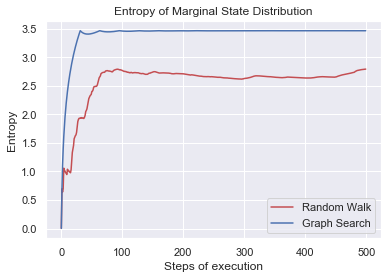

In [5]:
from time import sleep
from IPython.display import clear_output, display
import matplotlib 
%matplotlib inline
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
random_walk = False
eps = 1e-5
for random_walk, color, label in zip([True, False], ['r', 'b'], ['Random Walk', 'Graph Search']):
    density = np.zeros((num_chain,))
    current_state_global = 0

    entropies = []
    for itr in range(500):
        clear_output(wait=True)
        density[current_state_global] += 1
        ng, gpl, gp = select_goal()
        if len(gpl) > 1:
            goal_commanded = gpl[1]
        else:
            goal_commanded = gpl[0]
        print(goal_commanded)
        if random_walk:
            goal_commanded = select_goal_randomwalk()
        display("CURRENT STATE IS %d"%current_state_global)
        display("COMMANDED GOAL IS %d"%goal_commanded)
        transprob = transition_prob[current_state_global][goal_commanded]
        if np.random.random() < transprob:
            current_state_global = goal_commanded
        display("ACCOMPLISHED GOAL IS %d"%current_state_global)
        
        transitioned_states.append(current_state_global)
        display("CURRENT DENSITY IS " + str(density))
        norm_density = density/density.sum() + eps
        entropy = np.sum(-norm_density*np.log(norm_density)) #np.sum(np.abs(density/density.sum() - np.ones(8)*(1/8.)))
        entropies.append(entropy)
#         sleep(0.2)
    plt.plot(entropies, color=color, label=label)
plt.ylabel('Entropy')
plt.xlabel('Steps of execution')
plt.title("Entropy of Marginal State Distribution")
plt.legend()
plt.savefig('comparative_entropies.png')

In [6]:
entropies

[0.0035590068441408726,
 0.6965949209430488,
 1.1019539949716153,
 1.3895334312245375,
 1.6125768729552845,
 1.7948003336171365,
 1.9488545916820468,
 2.0822909959148483,
 2.1999802963552444,
 2.305248190105805,
 2.4004667495762435,
 2.487387416479257,
 2.567340248266717,
 2.6413591144255566,
 2.710263594711982,
 2.774714391710417,
 2.83525191469527,
 2.892323818178653,
 2.946305084834071,
 2.9975129510658314,
 3.0462181871880354,
 3.092653751046326,
 3.1370215164426885,
 3.1794975685067306,
 3.22023641735957,
 3.2593743848521948,
 3.2970323517846785,
 3.3333180052603097,
 3.3683276914951836,
 3.402147954390453,
 3.4348568217281503,
 3.4665248870940832,
 3.455290540411079,
 3.4456083172216037,
 3.437319694131613,
 3.4302851778443575,
 3.424381618621675,
 3.419499960038562,
 3.4155433451691577,
 3.4124255155477616,
 3.410069451856866,
 3.408406215169438,
 3.407373955356324,
 3.406917059441443,
 3.4069854176092242,
 3.407533788514829,
 3.4085212487279817,
 3.409910713716873,
 3.411668519

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
plt.plot(transitioned_states)

In [ ]:
transitioned_states